In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import time

### Shi Tomasi Algorithm

In [2]:
def shi_tomasi_corners(image, max_corners=100, quality_level=0.01, min_distance=10, k=0.04):
    # Convert image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Compute gradients using Sobel operator
    Ix = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
    Iy = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)
    
    # Compute elements of the structure tensor
    M11 = Ix ** 2
    M12 = Ix * Iy
    M22 = Iy ** 2
    
    # Compute eigenvalues
    eigenvalues = np.zeros_like(gray, dtype=np.float64)
    for y in range(gray.shape[0]):
        for x in range(gray.shape[1]):
            M = np.array([[M11[y, x], M12[y, x]],
                          [M12[y, x], M22[y, x]]])
            eigenvalues[y, x] = np.min(np.linalg.eigvals(M))
    
    # Apply thresholding based on minimum eigenvalue
    threshold = np.max(eigenvalues) * quality_level
    corners = []
    for y in range(gray.shape[0]):
        for x in range(gray.shape[1]):
            if eigenvalues[y, x] > threshold:
                corners.append((x, y))
    
    # Perform non-maximum suppression
    corners = np.array(corners, dtype=np.float32).reshape(-1, 1, 2)
    corners = cv2.goodFeaturesToTrack(gray, max_corners, quality_level, min_distance)
    
    return corners

In [3]:
# Load image
shitomasi_chessboard_image = cv2.imread('chessboard.png')
shitomasi_cubes_image = cv2.imread('cubes.png')

In [4]:
# Shi-Tomasi Corner Detection
shitomasi_chessboard_corners = shi_tomasi_corners(shitomasi_chessboard_image)
shitomasi_cubes_corners = shi_tomasi_corners(shitomasi_cubes_image)

In [5]:
# Draw detected corners on the image
for corner in shitomasi_chessboard_corners:
    x, y = corner.ravel()
    cv2.circle(shitomasi_chessboard_image, (int(x), int(y)), 3, (255, 0, 0), -1)

In [6]:
# Draw detected corners on the image
for corner in shitomasi_cubes_corners:
    x, y = corner.ravel()
    cv2.circle(shitomasi_cubes_image, (int(x), int(y)), 3, (255, 0, 0), -1)

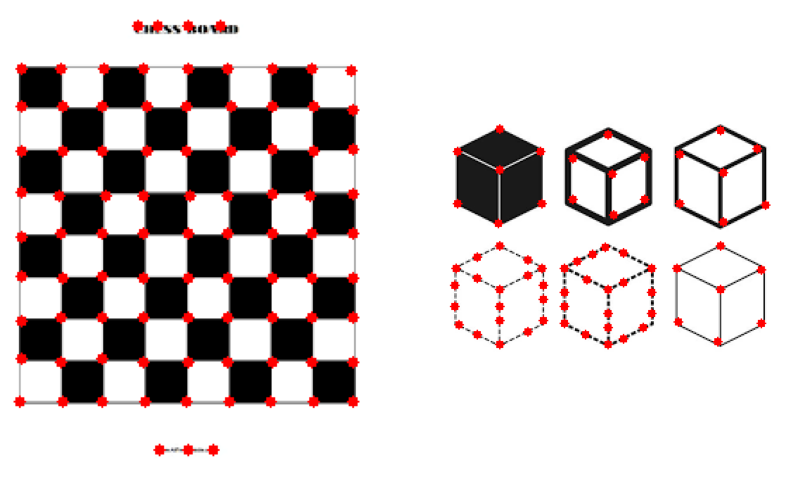

In [7]:
# Display the images side by side
plt.figure(figsize=(10, 8))

plt.subplot(1, 2, 1)  # Create subplot 1
plt.imshow(shitomasi_chessboard_image)
plt.axis('off')

plt.subplot(1, 2, 2)  # Create subplot 2
plt.imshow(shitomasi_cubes_image)
plt.axis('off')

plt.show()

### Harris Algorithm

In [8]:
# Load your image here
harris_chessboard_image = cv2.imread("chessboard.png")
harris_cubes_image =cv2.imread('cubes.png')

In [9]:
operated_harris_chessboard_image = cv2.cvtColor(harris_chessboard_image, cv2.COLOR_BGR2GRAY)
operated_harris_cubes_image = cv2.cvtColor(harris_cubes_image, cv2.COLOR_BGR2GRAY)

In [10]:
operated_harris_chessboard_image = np.float32(operated_harris_chessboard_image)
operated_harris_cubes_image = np.float32(operated_harris_cubes_image)

In [11]:
dest_chessboard = cv2.cornerHarris(operated_harris_chessboard_image, 2, 5, 0.03) 
dest_cubes = cv2.cornerHarris(operated_harris_cubes_image, 2, 5, 0.03)

In [12]:
dest_chessboard = cv2.dilate(dest_chessboard, None) 
dest_cubes = cv2.dilate(dest_cubes, None)

In [13]:
harris_chessboard_image[dest_chessboard > 0.01 * dest_chessboard.max()]=[0, 0, 255]
harris_cubes_image[dest_cubes > 0.01 * dest_cubes.max()]=[0, 0, 255]

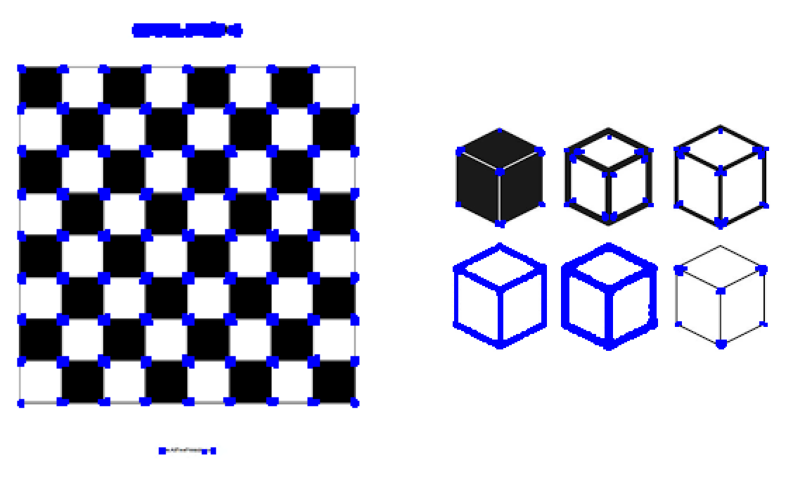

In [14]:
# Display the images side by side
plt.figure(figsize=(10, 8))

plt.subplot(1, 2, 1)  # Create subplot 1
plt.imshow(harris_chessboard_image)
plt.axis('off')

plt.subplot(1, 2, 2)  # Create subplot 2
plt.imshow(harris_cubes_image)
plt.axis('off')

plt.show()

### Efficiency

In [15]:
def modified_harris_corner_detection(image, alpha=1/25, threshold=0.01):
    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Compute derivatives using Sobel operator
    Ix = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
    Iy = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)

    # Compute elements of the structure tensor
    Ixx = Ix * Ix
    Ixy = Ix * Iy
    Iyy = Iy * Iy

    # Apply Gaussian filter to the structure tensor elements
    sigma = 1
    Ixx = cv2.GaussianBlur(Ixx, (5, 5), sigma)
    Ixy = cv2.GaussianBlur(Ixy, (5, 5), sigma)
    Iyy = cv2.GaussianBlur(Iyy, (5, 5), sigma)

    # Calculate the eigenvalues of the Hessian matrix
    det_H = Ixx * Iyy - Ixy**2
    trace_H = Ixx + Iyy
    lambda1 = 0.5 * (trace_H + np.sqrt(trace_H**2 - 4 * det_H))
    lambda2 = 0.5 * (trace_H - np.sqrt(trace_H**2 - 4 * det_H))

    # Compute the modified cornerness measure
    f = lambda1 * lambda2 - alpha * (lambda1 + lambda2)

    # Threshold the response to identify corners
    corners = np.argwhere(f > threshold * f.max())

    return corners



In [16]:
# Load your image here
chessboard_image = cv2.imread("chessboard.png")

# Detect corners using the modified system
start_time_modified = time.time()
chessboard_corners_modified = modified_harris_corner_detection(chessboard_image)
end_time_modified = time.time()
execution_time_modified = end_time_modified - start_time_modified

# Detect corners using the original Harris system (from previous question)
start_time_original = time.time()
operated_chessboard_image = cv2.cvtColor(chessboard_image, cv2.COLOR_BGR2GRAY)
operated_chessboard_image = np.float32(operated_chessboard_image)
dest_chessboard = cv2.cornerHarris(operated_chessboard_image, 2, 5, 0.03)
dest_chessboard = cv2.dilate(dest_chessboard, None)
chessboard_image[dest_chessboard > 0.01 * dest_chessboard.max()]=[0, 0, 255]
end_time_original = time.time()
execution_time_original = end_time_original - start_time_original

# Compare results and execution times
print(f"Modified system detected {len(chessboard_corners_modified)} corners.")
print(f"Execution time (modified system): {execution_time_modified:.4f} seconds")
print(f"Execution time (original system): {execution_time_original:.4f} seconds")

Modified system detected 3157 corners.
Execution time (modified system): 0.0100 seconds
Execution time (original system): 0.0040 seconds


In [17]:
# Load your image here
cubes_image = cv2.imread("cubes.png")

# Detect corners using the modified system
start_time_modified = time.time()
cubes_corners_modified = modified_harris_corner_detection(cubes_image)
end_time_modified = time.time()
execution_time_modified = end_time_modified - start_time_modified

# Detect corners using the original Harris system (from previous question)
start_time_original = time.time()
operated_cubes_image = cv2.cvtColor(cubes_image, cv2.COLOR_BGR2GRAY)
operated_cubes_image = np.float32(operated_cubes_image)
dest_cubes = cv2.cornerHarris(operated_cubes_image, 2, 5, 0.03)
dest_cubes = cv2.dilate(dest_cubes, None)
cubes_image[dest_cubes > 0.01 * dest_cubes.max()]=[0, 0, 255]
end_time_original = time.time()
execution_time_original = end_time_original - start_time_original

# Compare results and execution times
print(f"Modified system detected {len(cubes_corners_modified)} corners.")
print(f"Execution time (modified system): {execution_time_modified:.4f} seconds")
print(f"Execution time (original system): {execution_time_original:.4f} seconds")

Modified system detected 4072 corners.
Execution time (modified system): 0.0050 seconds
Execution time (original system): 0.0020 seconds


### My Own Images

### Shi Tomasi Algorithm on My Image

In [18]:
shitomasi_my_image = cv2.imread('my_image.jpg')

In [19]:
shitomasi_my_image_corners = shi_tomasi_corners(shitomasi_my_image)

In [20]:
for corner in shitomasi_my_image_corners:
    x, y = corner.ravel()
    cv2.circle(shitomasi_my_image, (int(x), int(y)), 4, (255, 0, 0), -1)

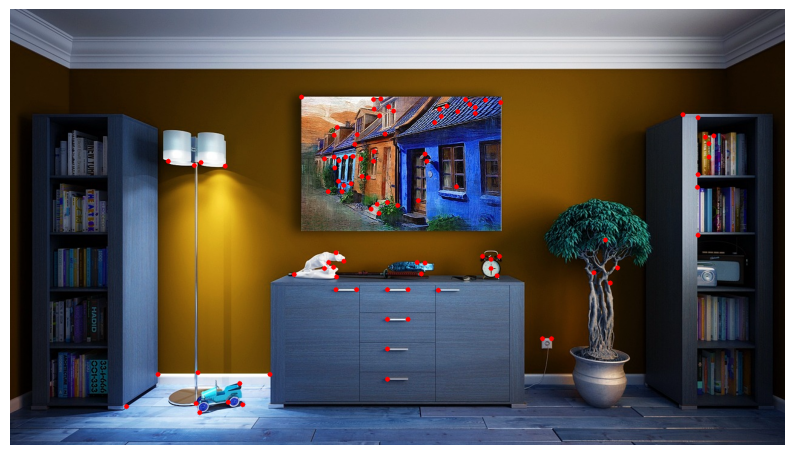

In [21]:
plt.figure(figsize=(10, 8))

plt.imshow(shitomasi_my_image)
plt.axis('off')

plt.show()

### Harris Algorithm on My Image

In [22]:
harris_my_image = cv2.imread("my_image.jpg")

In [23]:
operated_harris_my_image = cv2.cvtColor(harris_my_image, cv2.COLOR_BGR2GRAY)
operated_harris_my_image = np.float32(operated_harris_my_image)
dest_my_image = cv2.cornerHarris(operated_harris_my_image, 2, 5, 0.03)
dest_my_image = cv2.dilate(dest_my_image, None)
harris_my_image[dest_my_image > 0.01 * dest_my_image.max()]=[255, 0, 0]

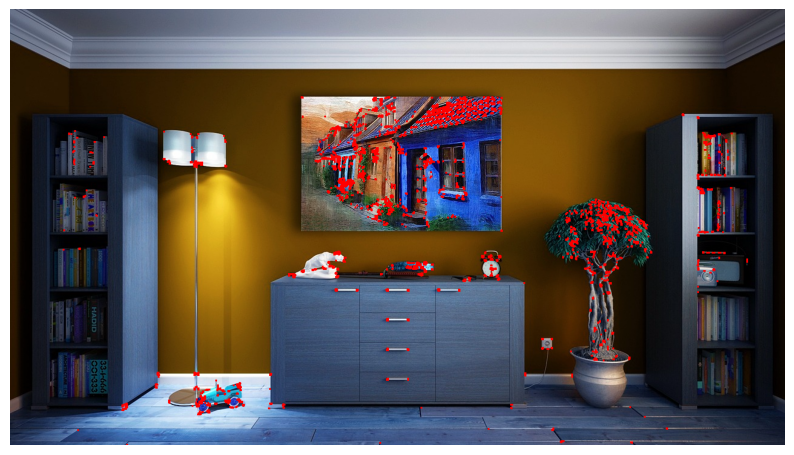

In [24]:
plt.figure(figsize=(10, 8))

plt.imshow(harris_my_image)
plt.axis('off')

plt.show()